1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

In [1]:
#to import libraries used in analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm




import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


In [2]:


# import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/Life Expectancy Data.csv')
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#to check how many rows and columns our dataframe has:
df.shape

(2938, 22)

In [4]:
# to see what columns look like
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Variables analysis
**Numerical variables**: 
- 'Year'
- 'Adult Mortality',
- 'infant deaths'
- 'Alcohol'
- 'percentage expenditure'
- 'Hepatitis B'
- 'Measles'
- 'BMI'
- 'under-five deaths'
- 'Polio'
- 'Total expenditure',
- 'Diphtheria'
- 'HIV/AIDS'
- 'GDP'
- 'Population'
- 'thinness  1-19 years',
- 'thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

**Categorical variables**: 
- 'Country'
- 'Status'

**Predicted variable**: 
- 'Life expectancy'

In [5]:
#To delete trailing spaces after the column names: 

df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# To further explore the dataset: 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
# to encode 'Status' and 'Year' categorical variables to use as predictor: 
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
df['Year'] = le.fit_transform(df['Year'])


In [9]:
# to explore how many null values we have: 
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
# To replace missing values with mean: 

# to filter dataframe, leaving the columns with numerical values only:
numeric_df = df.select_dtypes(include=np.number)
numeric_df

# To calculate the mean for each column: 
mean = numeric_df.mean()
mean

# to fill the missing values with corresponding means: 
df.fillna(mean, inplace=True)

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
#check the dataset for duplicates. 
duplicates = df.duplicated().sum()

duplicates

# We don't have duplicated values. 

0

<Axes: >

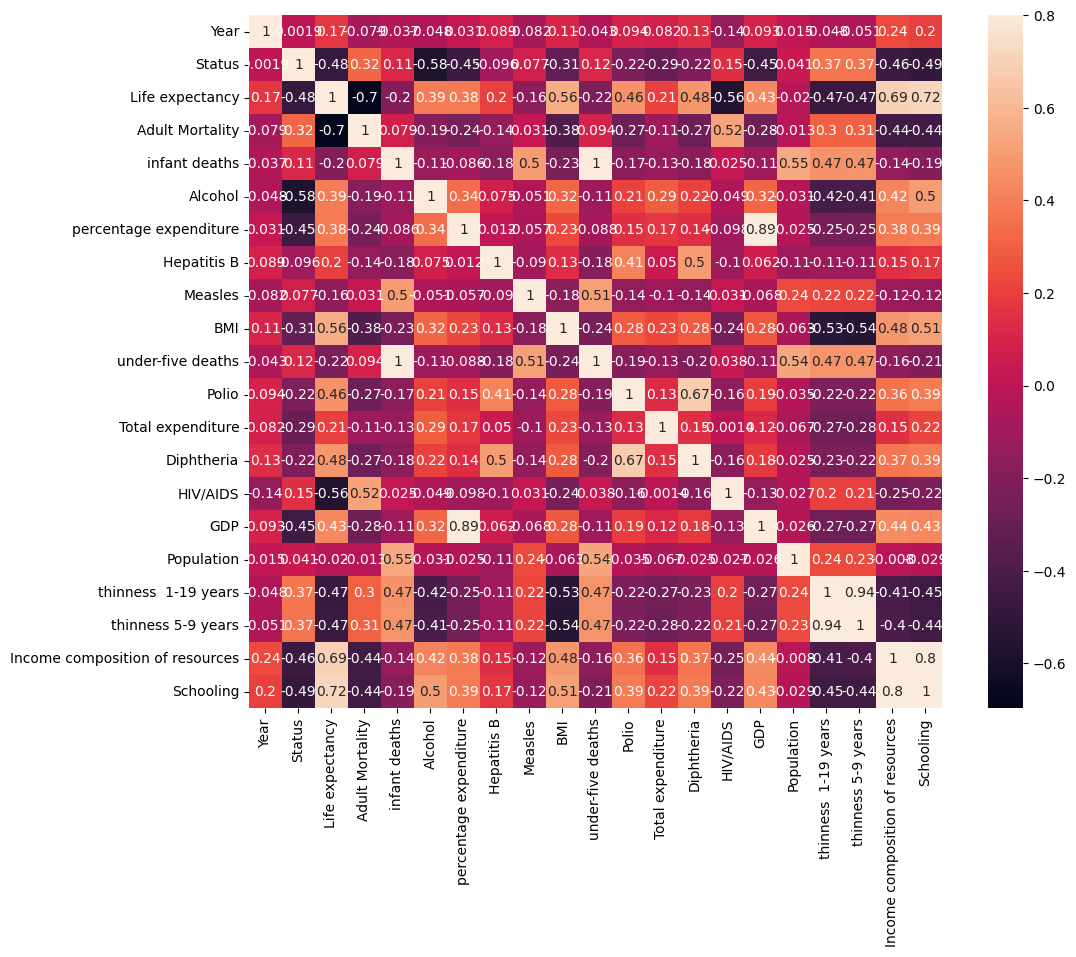

In [15]:
#To look for correlations between variables to understand what variables we can use to predict Life expectancy: 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corrmatrix = numeric_df.corr() # using filtered dataframe with numeric columns only.
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, annot=True, vmax=.8, square=True)

In [16]:
# to standardize data that will be used in our multiple regression model training: 
features = ['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI',
'under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years',
'Income composition of resources','Schooling']

scaler = StandardScaler() 

df[features] = scaler.fit_transform(df[features])

df.head()




,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,15,1,65.0,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,Afghanistan,14,1,59.9,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,Afghanistan,13,1,59.9,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,Afghanistan,12,1,59.5,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,Afghanistan,11,1,59.2,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


Building MLR Models

Economic: ('percentage expenditure', 'Total expenditure', 'GDP', 'Status)

In [162]:
# Define X (independent variables)
X1 = df[['percentage expenditure', 'Total expenditure', 'GDP','Status']]
# Define y (dependent variable)
y1 = df['Life expectancy']


In [163]:
# Split data into training and testing sets (80% train, 20% test)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [192]:
# Add a constant to the model (intercept term)
X1_train = sm.add_constant(X1_train)

# Fit the MLR model
model1 = sm.OLS(y1_train, X1_train)
results = model1.fit()
summarize(results)
# Print the summary of the regression


,coef,std err,t,P>|t|
const,76.5778,0.446,171.677,0.000
percentage expenditure,-0.9630,0.365,-2.641,0.008
Total expenditure,0.6913,0.174,3.975,0.000
GDP,3.3130,0.357,9.277,0.000
Status,-8.8507,0.504,-17.575,0.000


Evaluate the Model1 on the Testing Data

In [193]:
# Add a constant to the model (intercept term)
X1_test = sm.add_constant(X1_test)

# Predict using the model fitted on the training data
y1_pred = results.predict(X1_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'MLR Mean Squared Error (MSE): {mse}')
print(f'MLR R-squared: {r2}')

MLR Mean Squared Error (MSE): 58.41407090088105
MLR R-squared: 0.32574728233040373


Infectious Diseases
Fitting the model with 3 variables ('Polio', 'Diphtheria, 'HIV/AIDS')

In [166]:
# Define X (independent variables)
X2 = df[['Polio', 'Diphtheria','HIV/AIDS']]
# Define y (dependent variable)
y2 = df['Life expectancy']

In [189]:
# Split data into training and testing sets (80% train, 20% test)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [194]:
# Add a constant to the model (intercept term)
X2_train = sm.add_constant(X2_train)

# Fit the MLR model
model2 = sm.OLS(y2_train, X2_train)
results = model2.fit()

# Print the summary of the regression
summarize(results)

,coef,std err,t,P>|t|
const,69.2992,0.142,487.827,0.0
Polio,2.0812,0.192,10.820,0.0
Diphtheria,2.2860,0.191,11.941,0.0
HIV/AIDS,-4.5159,0.139,-32.536,0.0


Evaluate the Model2 on the Testing Data

In [195]:
# Add a constant to the model (intercept term)
X2_test = sm.add_constant(X2_test)

# Predict using the model fitted on the training data
y2_pred = results.predict(X2_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f'MLR Mean Squared Error (MSE): {mse}')
print(f'MLR R-squared: {r2}')

MLR Mean Squared Error (MSE): 42.799461495453066
MLR R-squared: 0.5059811312060222


 Household income:'Income composition of resources' &  Education: 'Schooling'

In [196]:
# Define X (independent variables)
X3 = df[['Income composition of resources', 'Schooling']]
# Define y (dependent variable)
y3 = df['Life expectancy']

In [197]:
# Split data into training and testing sets (80% train, 20% test)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [198]:
# Add a constant to the model (intercept term)
X3_train = sm.add_constant(X3_train)

# Fit the MLR model
model3 = sm.OLS(y3_train, X3_train)
results = model3.fit()

# Print the summary of the regression
summarize(results)

,coef,std err,t,P>|t|
const,69.1792,0.133,521.664,0.0
Income composition of resources,3.4561,0.226,15.263,0.0
Schooling,4.0541,0.224,18.120,0.0


Evaluate the Model3 on the Testing Data

In [199]:
# Add a constant to the model (intercept term)
X3_test = sm.add_constant(X3_test)

# Predict using the model fitted on the training data
y3_pred = results.predict(X3_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print(f'MLR Mean Squared Error (MSE): {mse}')
print(f'MLR R-squared: {r2}')

MLR Mean Squared Error (MSE): 37.16664441248806
MLR R-squared: 0.5709987231620657


Lifestyle:'Alcohol''BMI' 

In [201]:
# Define X (independent variables)
X4 = df[['Alcohol', 'BMI']]
# Define y (dependent variable)
y4 = df['Life expectancy']

In [202]:
# Split data into training and testing sets (80% train, 20% test)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [203]:
# Add a constant to the model (intercept term)
X4_train = sm.add_constant(X4_train)

# Fit the MLR model
model4 = sm.OLS(y4_train, X4_train)
results = model4.fit()
summarize(results)
# Print the summary of the regression


,coef,std err,t,P>|t|
const,69.2282,0.158,437.351,0.0
Alcohol,2.1941,0.168,13.067,0.0
BMI,4.6059,0.167,27.611,0.0


Evaluate the Model4 on the Testing Data

In [204]:
# Add a constant to the model (intercept term)
X4_test = sm.add_constant(X4_test)

# Predict using the model fitted on the training data
y4_pred = results.predict(X4_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y4_test, y4_pred)
r2 = r2_score(y4_test, y4_pred)

print(f'MLR Mean Squared Error (MSE): {mse}')
print(f'MLR R-squared: {r2}')

MLR Mean Squared Error (MSE): 52.39185231816279
MLR R-squared: 0.39525959645567876


 Mortality:'Adult Mortality' ,'infant deaths', 'thinness  1-19 years'

In [205]:
# Define X (independent variables)
X5 = df[['Adult Mortality', 'infant deaths', 'thinness  1-19 years']]
# Define y (dependent variable)
y5 = df['Life expectancy']

In [206]:
# Split data into training and testing sets (80% train, 20% test)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [207]:
# Add a constant to the model (intercept term)
X5_train = sm.add_constant(X5_train)

# Fit the MLR model
model5 = sm.OLS(y5_train, X5_train)
results = model5.fit()

# Print the summary of the regression
summarize(results)

,coef,std err,t,P>|t|
const,69.2995,0.130,533.342,0.000
Adult Mortality,-5.8595,0.136,-43.212,0.000
infant deaths,-0.2098,0.155,-1.351,0.177
thinness 1-19 years,-2.6072,0.155,-16.865,0.000


Evaluate the Model5 on the Testing Data

In [208]:
# Add a constant to the model (intercept term)
X5_test = sm.add_constant(X5_test)

# Predict using the model fitted on the training data
y5_pred = results.predict(X5_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y5_test, y5_pred)
r2 = r2_score(y5_test, y5_pred)

print(f'MLR Mean Squared Error (MSE): {mse}')
print(f'MLR R-squared: {r2}')

MLR Mean Squared Error (MSE): 39.85310185620201
MLR R-squared: 0.5399899062042235
